In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error as mape #利用mape评估模型的时候会使用
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
data1 = pd.read_csv(r"E:\DA\inotebook\雪球\中证500.csv")

In [3]:
data1

,time,price
0,2021/1/4,6482.79
1,2021/1/5,6539.73
2,2021/1/6,6528.14
3,2021/1/7,6538.12
4,2021/1/8,6557.60
...,...,...
739,2024/1/18,5066.96
740,2024/1/19,5018.43
741,2024/1/22,4780.97
742,2024/1/23,4865.74


In [4]:
data1['time'] = pd.to_datetime(data1['time'])

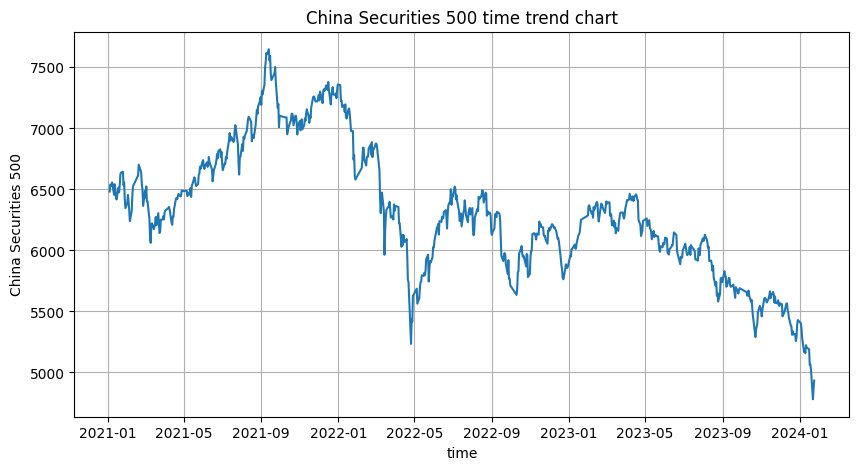

In [5]:
plt.figure(figsize = (10,5))
plt.plot(data1['time'], data1['price'])
plt.xlabel('time')
plt.ylabel('China Securities 500')
plt.title('China Securities 500 time trend chart')
plt.grid(True)
plt.show()

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 

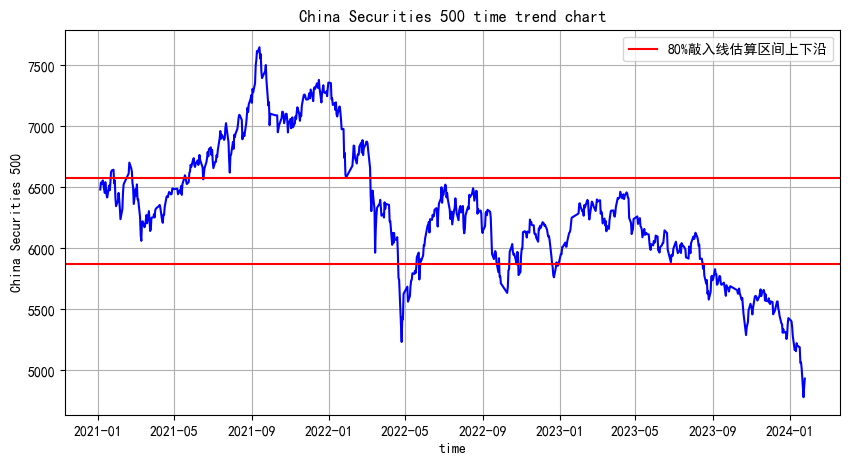

In [7]:
#再加上下沿的水平线
plt.figure(figsize = (10,5))
plt.plot(data1['time'], data1['price'],color = 'b')
plt.xlabel('time')
plt.ylabel('China Securities 500')
plt.title('China Securities 500 time trend chart')
plt.axhline(y=5875, color='r', label = '80%敲入线估算区间上下沿')
plt.axhline(y=6580, color='r')
plt.legend()
plt.grid(True)
plt.savefig('80%敲入线估算区间上下沿-中证500.png')
plt.show()

In [8]:
rows = []

In [9]:
for index, row in data1.iterrows():
    if 5875 <= row['price'] <= 6580:
        # 如果指数在两条线之间，则将该行添加到新DataFrame中
         rows.append(row)
filtered_df = pd.concat(rows, ignore_index=True)

In [10]:
count = len(filtered_df)/2
print(f"位于两条水平线之间的时间（天数）：{count}")

位于两条水平线之间的时间（天数）：398.0


In [11]:
zz500_percent_80 = count/744
zz500_percent_80

0.5349462365591398

In [12]:
#中证500
#如果简单假设雪球每月的发行量呈现均匀分布，仅考虑 2021年以来发行的雪球产品
#能够对已经进入敲入区间的雪球产品发行量进行估计
#总共774天，位于敲入区间上下沿之间的天数有398天
#那么敲入的规模应占据接近53%，有53%规模的雪球将敲入。

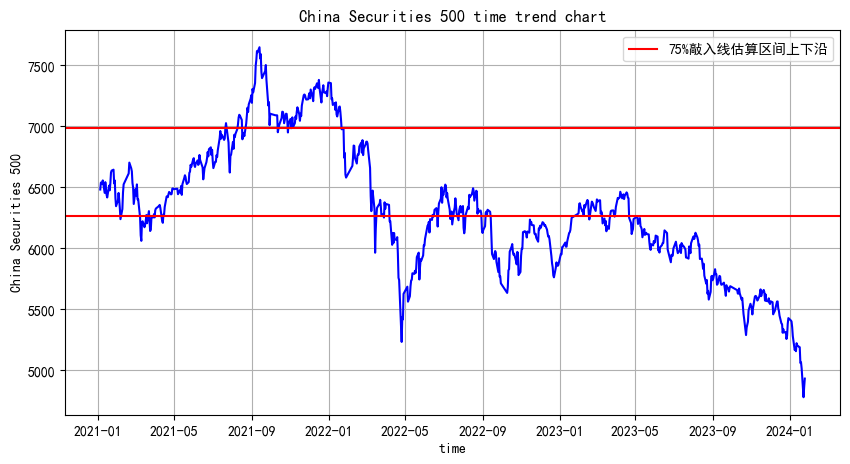

In [13]:
#观察75%敲入线的情况
plt.figure(figsize = (10,5))
plt.plot(data1['time'], data1['price'],color = 'b')
plt.xlabel('time')
plt.ylabel('China Securities 500')
plt.title('China Securities 500 time trend chart')
plt.axhline(y=6266, color='r', label = '75%敲入线估算区间上下沿')
plt.axhline(y=6986, color='r')
plt.legend()
plt.grid(True)
plt.savefig('75%敲入线估算区间上下沿-中证500.png')
plt.show()

In [14]:
rows_75 = []
for index, row in data1.iterrows():
    if 6266 <= row['price'] <= 6986:
        # 如果指数在两条线之间，则将该行添加到新DataFrame中
         rows_75.append(row)

In [15]:
filtered_df_75 = pd.concat(rows_75, ignore_index=True)
count_75 = len(filtered_df_75)/2
print(f"位于两条水平线之间的时间（天数）：{count_75}")

位于两条水平线之间的时间（天数）：279.0


In [16]:
zz500_percent_75 = count_75/744
zz500_percent_75

0.375

In [17]:
#总共774天，位于敲入区间上下沿之间的天数有279天
#那么敲入的规模应占据接近37.5%，有37.5%规模的雪球将敲入。

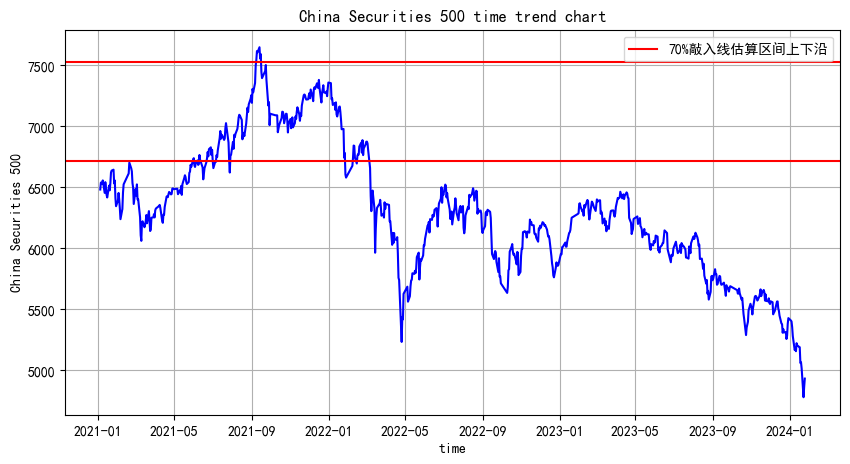

In [18]:
#观察70%敲入线的情况
plt.figure(figsize = (10,5))
plt.plot(data1['time'], data1['price'],color = 'b')
plt.xlabel('time')
plt.ylabel('China Securities 500')
plt.title('China Securities 500 time trend chart')
plt.axhline(y=6715, color='r', label = '70%敲入线估算区间上下沿')
plt.axhline(y=7528, color='r')
plt.legend()
plt.grid(True)
plt.savefig('70%敲入线估算区间上下沿-中证500.png')
plt.show()

In [19]:
rows_70 = []
for index, row in data1.iterrows():
    if 6715 <= row['price'] <= 7528:
        # 如果指数在两条线之间，则将该行添加到新DataFrame中
         rows_70.append(row)
filtered_df_70 = pd.concat(rows_70, ignore_index=True)
count_70 = len(filtered_df_70)/2
print(f"位于两条水平线之间的时间（天数）：{count_70}")

位于两条水平线之间的时间（天数）：162.0


In [20]:
zz500_percent_70 = count_70/744
zz500_percent_70

0.21774193548387097

In [21]:
#总共774天，位于敲入区间上下沿之间的天数有162天
#那么敲入的规模应占据接近21.7%，有21.7%规模的雪球将敲入。

In [22]:
data2 = pd.read_csv(r"E:\DA\inotebook\雪球\中证1000.csv")

In [23]:
data2

,time,price
0,2021-01-04,6798.76
1,2021-01-05,6807.45
2,2021-01-06,6724.95
3,2021-01-07,6616.55
4,2021-01-08,6585.36
...,...,...
739,2024-01-18,5373.42
740,2024-01-19,5306.99
741,2024-01-22,5000.83
742,2024-01-23,5079.63


In [24]:
data2['time'] = pd.to_datetime(data2['time'])

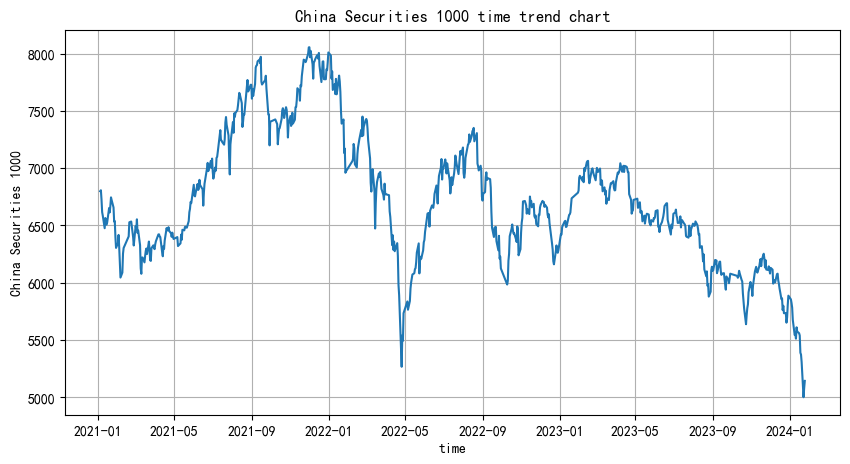

In [25]:
plt.figure(figsize = (10,5))
plt.plot(data1['time'], data2['price'])
plt.xlabel('time')
plt.ylabel('China Securities 1000')
plt.title('China Securities 1000 time trend chart')
plt.grid(True)
plt.show()

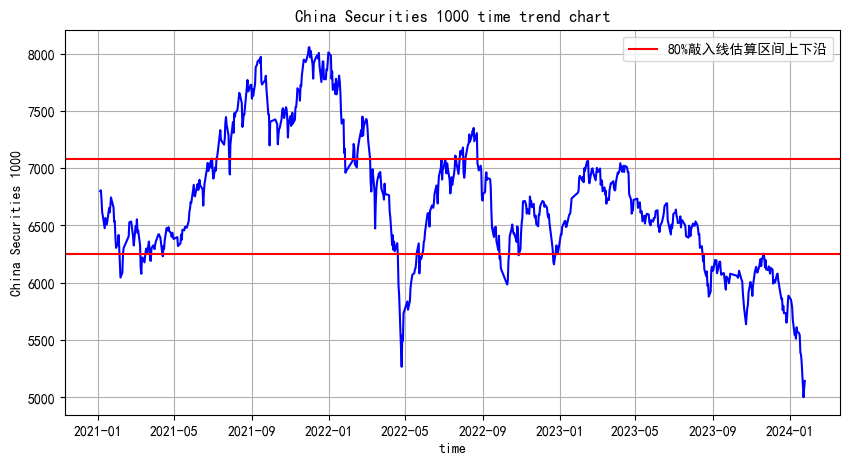

In [26]:
#再加上下沿的水平线
plt.figure(figsize = (10,5))
plt.plot(data1['time'], data2['price'],color = 'b')
plt.xlabel('time')
plt.ylabel('China Securities 1000')
plt.title('China Securities 1000 time trend chart')
plt.axhline(y=6250, color='r', label = '80%敲入线估算区间上下沿')
plt.axhline(y=7080 , color='r')
plt.legend()
plt.grid(True)
plt.savefig('80%敲入线估算区间上下沿-中证1000.png')
plt.show()

In [27]:
rows2 = []

In [28]:
for index, row in data2.iterrows():
    if 6250 <= row['price'] <= 7080 :
        # 如果指数在两条线之间，则将该行添加到新DataFrame中
         rows2.append(row)
filtered_df2 = pd.concat(rows2, ignore_index=True)

In [29]:
count_zz1000 = len(filtered_df2)/2
print(f"位于两条水平线之间的时间（天数）：{count_zz1000}")

位于两条水平线之间的时间（天数）：418.0


In [30]:
zz1000_percent = count_zz1000/744
zz1000_percent

0.5618279569892473

In [31]:
#中证1000
#总共774天，位于敲入区间上下沿之间的天数有418天
#那么敲入的规模应占据接近56%，有56%规模的雪球将敲入。

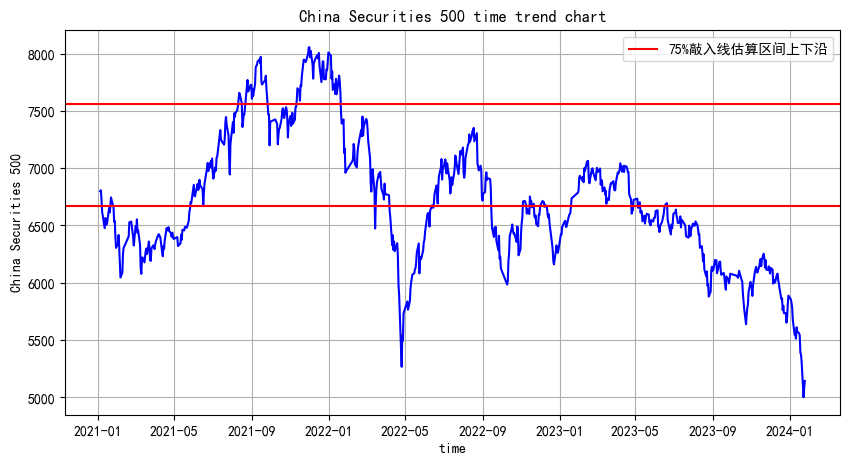

In [32]:
#观察75%敲入线的情况
plt.figure(figsize = (10,5))
plt.plot(data1['time'], data2['price'],color = 'b')
plt.xlabel('time')
plt.ylabel('China Securities 500')
plt.title('China Securities 500 time trend chart')
plt.axhline(y=6666, color='r', label = '75%敲入线估算区间上下沿')
plt.axhline(y=7560, color='r')
plt.legend()
plt.grid(True)
plt.savefig('75%敲入线估算区间上下沿-中证1000.png')
plt.show()

In [33]:
rows2_75 = []
for index, row in data2.iterrows():
    if 6666 <= row['price'] <= 7560:
        # 如果指数在两条线之间，则将该行添加到新DataFrame中
         rows2_75.append(row)

In [34]:
filtered_df2_75 = pd.concat(rows2_75, ignore_index=True)
count_zz1000_75 = len(filtered_df2_75)/2
print(f"位于两条水平线之间的时间（天数）：{count_zz1000_75}")

位于两条水平线之间的时间（天数）：284.0


In [35]:
zz1000_percent_75 = count_zz1000_75/744
zz1000_percent_75

0.3817204301075269

In [36]:
#总共774天，位于敲入区间上下沿之间的天数有284天
#那么敲入的规模应占据接近38%，有38%规模的雪球将敲入。

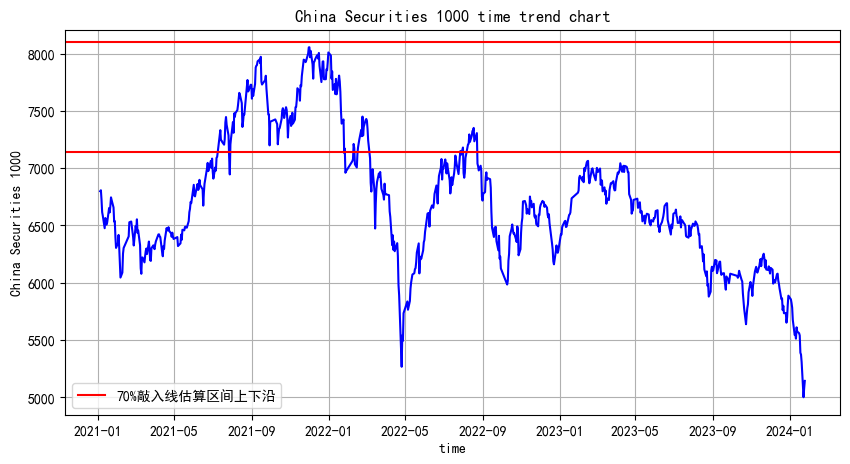

In [37]:
#观察70%敲入线的情况
plt.figure(figsize = (10,5))
plt.plot(data1['time'], data2['price'],color = 'b')
plt.xlabel('time')
plt.ylabel('China Securities 1000')
plt.title('China Securities 1000 time trend chart')
plt.axhline(y=7140, color='r', label = '70%敲入线估算区间上下沿')
plt.axhline(y=8100, color='r')
plt.legend()
plt.grid(True)
plt.savefig('70%敲入线估算区间上下沿-中证1000.png')
plt.show()

In [38]:
rows2_70 = []
for index, row in data1.iterrows():
    if 7140 <= row['price'] <= 8100:
        # 如果指数在两条线之间，则将该行添加到新DataFrame中
         rows2_70.append(row)
filtered_df2_70 = pd.concat(rows2_70, ignore_index=True)
count_zz1000_75 = len(filtered_df2_70)/2
print(f"位于两条水平线之间的时间（天数）：{count_zz1000_75}")

位于两条水平线之间的时间（天数）：62.0


In [39]:
zz500_percent_70 = count_zz1000_75/744
zz500_percent_70

0.08333333333333333

In [40]:
#总共774天，位于敲入区间上下沿之间的天数有62天
#那么敲入的规模应占据接近8.3%，有8.3%规模的雪球将敲入。